In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [327]:
train_positive = np.random.normal(loc=8.5, scale=4.0, size=[50000])
train_negative = np.random.normal(loc=-8.5, scale=4.0, size=[50000])

test_positive = np.random.normal(loc=12.5, scale=4.0, size=[10000])
test_negative1 = np.random.normal(loc=-8.5, scale=4.0, size=[50000])
test_negative2 = np.random.normal(loc=-25.5, scale=4.0, size=[25000])

test_negative = np.concatenate((test_negative1, test_negative2))

train = np.concatenate((train_positive, train_negative))
test = np.concatenate((test_positive, test_negative))

alpha = len(train_negative)/len(train)   # class ratio of the training test
beta = len(test_negative)/len(test)    # Class ratio of the test sets

bin_range = np.arange(-50,30,0.3)

In [328]:
train_positive

array([12.48948241,  2.20961409, 10.36463397, ..., 15.08632272,
        5.11508161,  6.06698811])

In [329]:
len(train)


100000

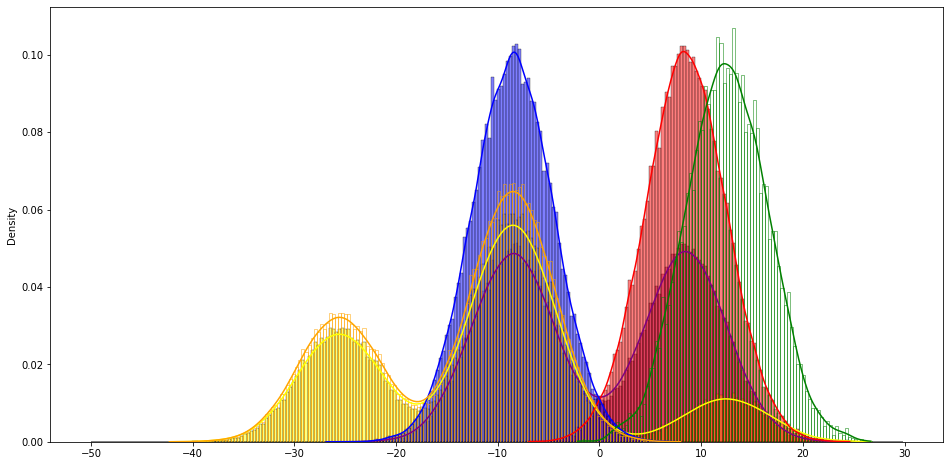

<Figure size 432x288 with 0 Axes>

In [330]:
fig, ax = plt.subplots(figsize=(16,8))
a=sns.histplot(train, bins=bin_range, stat='density', color='purple', kde=True, fill=True)
a=sns.histplot(test, bins=bin_range, stat='density',color='yellow', kde=True, fill=True)
a=sns.histplot(train_positive, bins=bin_range, stat='density',color='red', kde=True, fill=True)
a=sns.histplot(train_negative, bins=bin_range, stat='density',color='blue', kde=True, fill=True)
a=sns.histplot(test_positive, bins=bin_range, stat='density',color='green', kde=True, fill=False)
a=sns.histplot(test_negative, bins=bin_range, stat='density',color='orange', kde=True, fill=False)
f = plt.figure()
plt.show()
f.savefig("d:\\distributinos.png", bbox_inches='tight')


In [331]:
# fig, ax = plt.subplots(figsize=(16,16))
# train = np.concatenate((train_positive,train_negative))
# test = np.concatenate((test_positive,test_negative))
# a=sns.kdeplot(train,  color='purple')
# a=sns.kdeplot(test,  color='yellow')
# a=sns.kdeplot(train_positive, color='red')
# a=sns.kdeplot(train_negative, color='blue')
# a=sns.kdeplot(test_positive,  color='green')
# a=sns.kdeplot(test_negative,  color='orange')


In [332]:
[X_s,_] = np.histogram(train, density=True, bins=bin_range)
[T_s,_] = np.histogram(test, density=True, bins=bin_range)
[X_1,_] = np.histogram(train_positive, density=True, bins=bin_range)
[X_0,_] = np.histogram(train_negative, density=True, bins=bin_range)
[T_1,_] = np.histogram(test_positive, density=True, bins=bin_range)
[T_0,_] = np.histogram(test_negative, density=True, bins=bin_range)

# plt.bar(bin_range[:-1], ratio)


<BarContainer object of 266 artists>

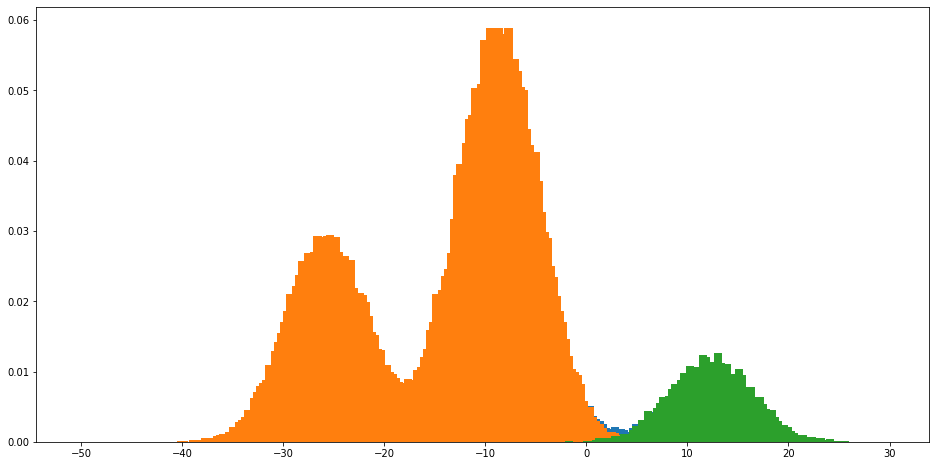

In [333]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(bin_range[:-1], T_s)
plt.bar(bin_range[:-1], (beta)*T_0)
plt.bar(bin_range[:-1], (1-beta)*T_1)


<BarContainer object of 266 artists>

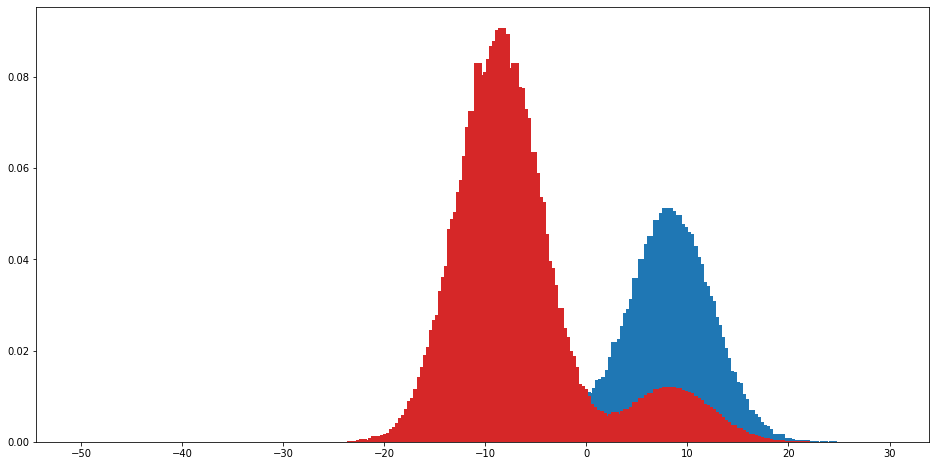

In [334]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(bin_range[:-1], X_s)
plt.bar(bin_range[:-1], (alpha)*X_0)
plt.bar(bin_range[:-1], (1-beta)*X_1)
plt.bar(bin_range[:-1], beta*X_0 + (1-beta)*X_1)


<BarContainer object of 266 artists>

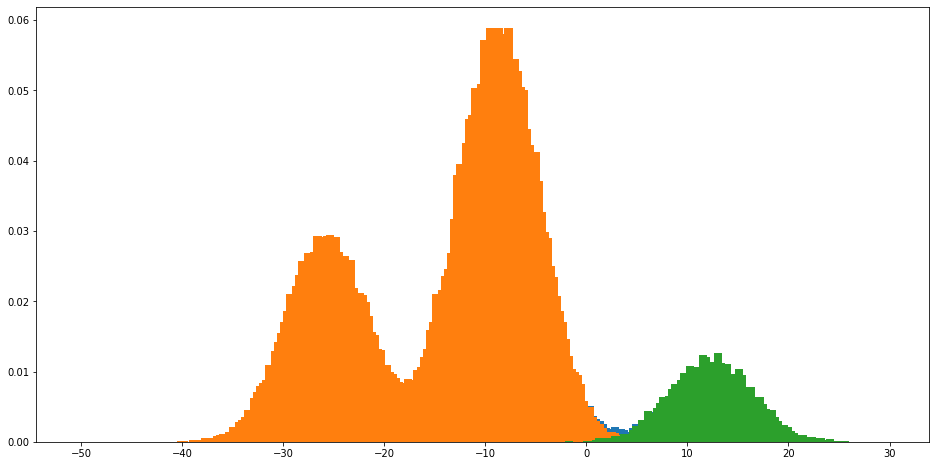

In [335]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(bin_range[:-1], T_s)
plt.bar(bin_range[:-1], (beta)*T_0)
plt.bar(bin_range[:-1], (1-beta)*T_1)


In [336]:
ratio = X_1/(beta*X_0+(1-beta)*X_1)
ratio[np.isnan(ratio)] = 0

neg=np.max(np.where(ratio>=1/(1-beta)*0.99))
print(neg)
ratio[neg:]=1/(1-beta)

T_1a = T_s*ratio
T_a = (T_s-(1-beta)*T_1a)/(beta)


248


C:\Users\kfattila\AppData\Local\Temp/ipykernel_332/1003704095.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = X_1/(beta*X_0+(1-beta)*X_1)


In [337]:
len(ratio)

266

<BarContainer object of 266 artists>

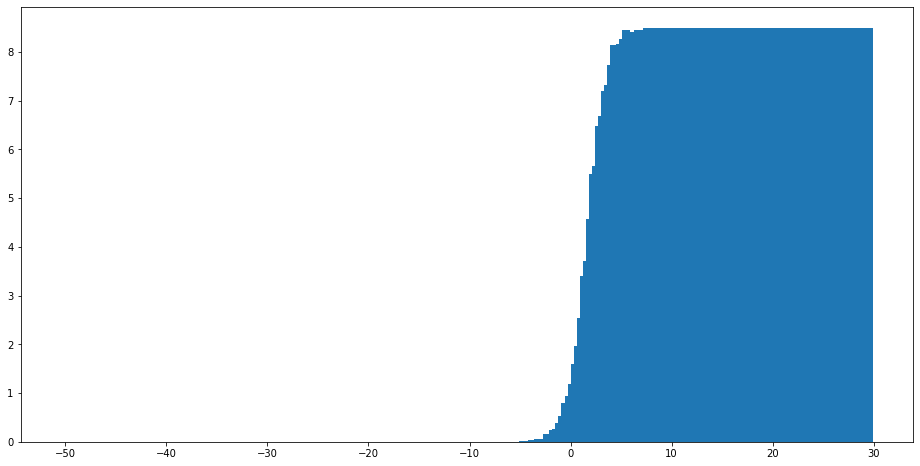

In [338]:
fig, ax = plt.subplots(figsize=(16,8))
# plt.bar(bin_range[:-1], T_1a, alpha=0.99)
plt.bar(bin_range[:-1], ratio, )  # True test null


<BarContainer object of 266 artists>

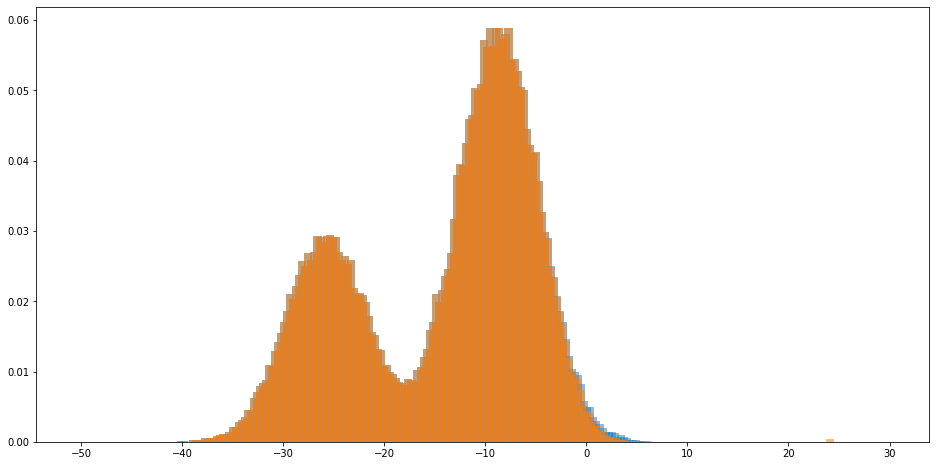

In [339]:
fig, ax = plt.subplots(figsize=(16,8))
# plt.bar(bin_range[:-1], T_s, alpha=0.99)
plt.bar(bin_range[:-1], (beta)*T_0, alpha=0.5)  # True test null|
plt.bar(bin_range[:-1], (beta)*T_a, alpha=0.5)  # Approximated test null


<BarContainer object of 266 artists>

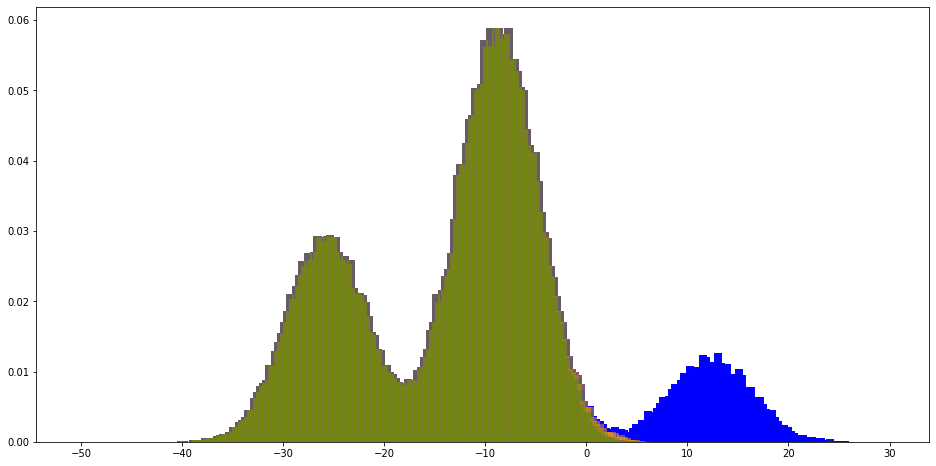

In [340]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(bin_range[:-1], T_s, alpha=0.99, color='blue')
plt.bar(bin_range[:-1], (beta)*T_0, alpha=0.5, color='orange')  # True test null
plt.bar(bin_range[:-1], (beta)*T_a, alpha=0.2, color='green')  # Approximated test null


In [341]:
[X_s,_] = np.histogram(train, density=False, bins=bin_range)
[T_s,_] = np.histogram(test, density=False, bins=bin_range)
[X_1,_] = np.histogram(train_positive, density=False, bins=bin_range)
[X_0,_] = np.histogram(train_negative, density=False, bins=bin_range)
[T_1,_] = np.histogram(test_positive, density=False, bins=bin_range)
[T_0,_] = np.histogram(test_negative, density=False, bins=bin_range)

ratio_AB = X_0/X_s
ratio_AB[np.isnan(ratio_AB)] = 0
T_AB = T_s*ratio_AB

C:\Users\kfattila\AppData\Local\Temp/ipykernel_332/787867899.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio_AB = X_0/X_s


<BarContainer object of 266 artists>

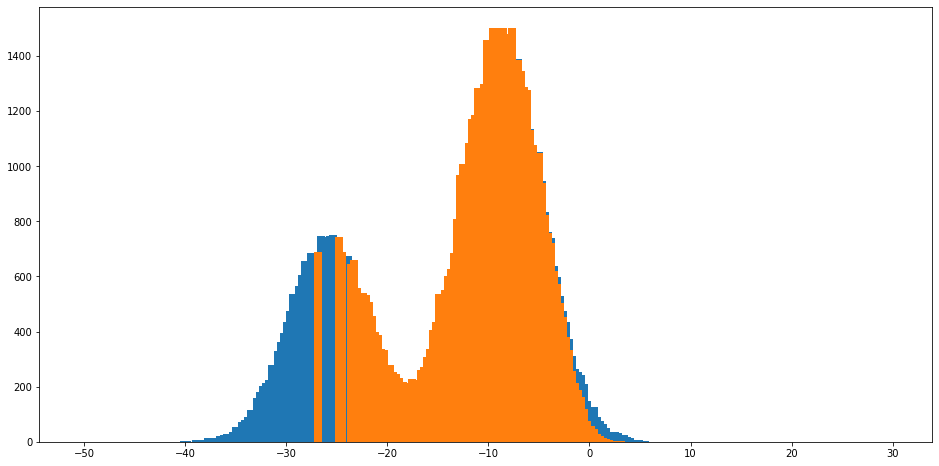

In [342]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(bin_range[:-1], T_0)
plt.bar(bin_range[:-1], T_AB)
# plt.bar(bin_range[:-1], T_AB)
